# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [3]:
dataset = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset

   8192/Unknown 0s 13us/step

'C:\\Users\\nsara\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [4]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car name"]

In [6]:
df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)
df

C:\Users\nsara\AppData\Local\Temp\ipykernel_10440\4045023703.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car name        0
dtype: int64

### Limpia los datos

Trata los missings y variables categóricas

In [10]:
# ¿Cuántos valores faltan por columna?
df.replace('?', pd.NA).isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car name        0
dtype: int64

In [12]:
# 1. Reemplazar “?” por NaN
df['Horsepower'].replace('?', pd.NA, inplace=True)
# 2. Eliminar filas faltantes
df.dropna(subset=['Horsepower'], inplace=True)
# 3. Convertir a float
df['Horsepower'] = df['Horsepower'].astype('float32')

In [ ]:
# Origin
df = pd.get_dummies(df, columns=['Origin'], prefix='Origin')

In [19]:
# Car
# Ejemplo: extraer fabricante y codificar
df['Manufacturer'] = df['Car name'].apply(lambda s: s.split()[0])
df = pd.get_dummies(df, columns=['Manufacturer'], prefix='Mfg')
# Luego puedes descartar 'Car name'
df.drop(columns=['Car name'], inplace=True)

In [ ]:
# Revisar si esta to ok
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MPG                392 non-null    float64
 1   Cylinders          392 non-null    int64  
 2   Displacement       392 non-null    float64
 3   Horsepower         392 non-null    float32
 4   Weight             392 non-null    float64
 5   Acceleration       392 non-null    float64
 6   Model Year         392 non-null    int64  
 7   Origin_1           392 non-null    bool   
 8   Origin_2           392 non-null    bool   
 9   Origin_3           392 non-null    bool   
 10  Mfg_amc            392 non-null    bool   
 11  Mfg_audi           392 non-null    bool   
 12  Mfg_bmw            392 non-null    bool   
 13  Mfg_buick          392 non-null    bool   
 14  Mfg_cadillac       392 non-null    bool   
 15  Mfg_capri          392 non-null    bool   
 16  Mfg_chevroelt      392 non-null

In [21]:
print(df.head())


    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin_1  Origin_2  Origin_3  ...  Mfg_renault  Mfg_saab  \
0          70      True     False     False  ...        False     False   
1          70      True     False     False  ...        False     False   
2          70      True     False     False  ...        False     False   
3          70      True     False     False  ...        False     False   
4          70      True     False     False  ...        False     False   

   Mfg_subaru  Mfg_toyota  Mfg_toyouta  Mfg_triumph  Mfg_vokswagen  \
0       False       False        False        False       

### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [23]:
# df.drop(columns=["Car name", "Origin", "Marca"], inplace=True)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3,...,Mfg_renault,Mfg_saab,Mfg_subaru,Mfg_toyota,Mfg_toyouta,Mfg_triumph,Mfg_vokswagen,Mfg_volkswagen,Mfg_volvo,Mfg_vw
0,18.0,8,307.0,130.0,3504.0,12.0,70,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
from sklearn.model_selection import train_test_split

# Suponiendo que 'df' es tu DataFrame ya limpio
train_df, test_df = train_test_split(
    df,
    test_size=0.2,        # 20 % para test
    random_state=42,      # semilla fija para reproducibilidad
    shuffle=True          # mezcla antes de partir
)

# Verifica tamaños
print(f"Entrenamiento: {train_df.shape[0]} filas")
print(f"Prueba:       {test_df.shape[0]} filas")

Entrenamiento: 313 filas
Prueba:       79 filas


### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

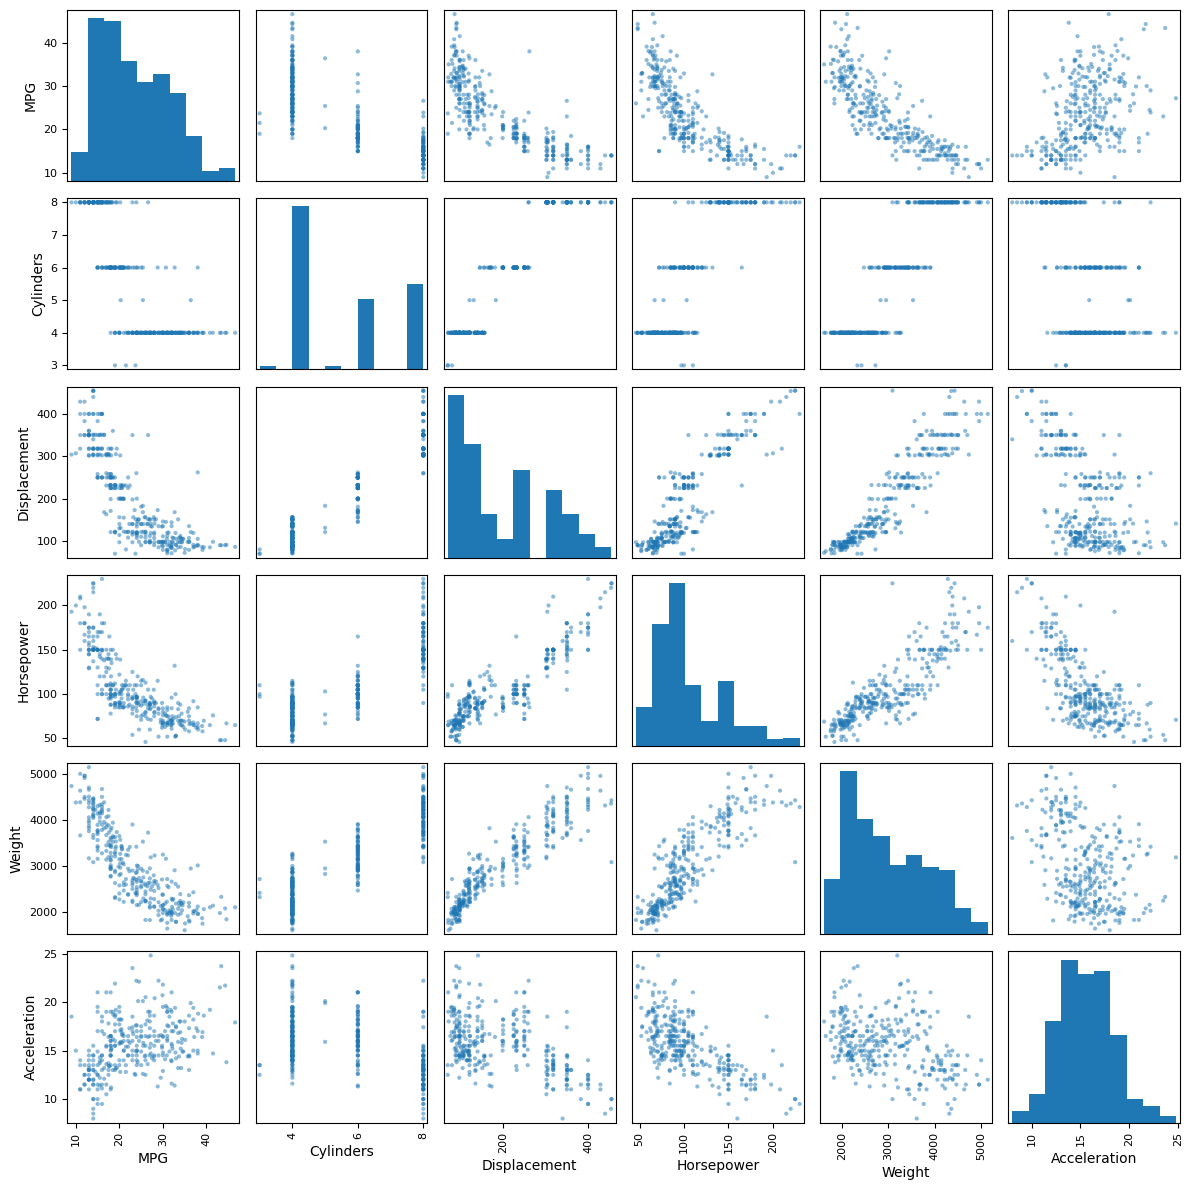

In [25]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# 1. Selecciona las columnas numéricas de interés
features = [
    'MPG', 
    'Cylinders', 
    'Displacement', 
    'Horsepower', 
    'Weight', 
    'Acceleration'
]

# 2. Crea el scatter‐matrix
scatter_matrix(
    train_df[features], 
    figsize=(12, 12),      # tamaño de la figura
    diagonal='hist',       # histogramas en la diagonal
    alpha=0.5              # transparencia para ver densidades
)

# 3. Ajusta espacios y muestra
plt.tight_layout()
plt.show()

Tambien revise las estadisticas generales:

In [26]:
# 1. Selecciona solo las columnas numéricas de interés
cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

# 2. Calcula el describe()
stats = train_df[cols].describe().transpose()

# 3. Muestra la tabla
print(stats)


              count         mean         std     min     25%     50%     75%  \
MPG           313.0    23.599361    7.956255     9.0    17.0    23.0    30.0   
Cylinders     313.0     5.482428    1.700446     3.0     4.0     4.0     8.0   
Displacement  313.0   195.517572  103.766567    70.0   105.0   151.0   302.0   
Horsepower    313.0   104.594246   38.283669    46.0    76.0    95.0   129.0   
Weight        313.0  2986.124601  841.133957  1613.0  2234.0  2855.0  3645.0   
Acceleration  313.0    15.544089    2.817864     8.0    13.5    15.5    17.3   

                 max  
MPG             46.6  
Cylinders        8.0  
Displacement   455.0  
Horsepower     230.0  
Weight        5140.0  
Acceleration    24.8  


### Separa las features del target

Separe el target de las features.

In [27]:
# Para el set de entrenamiento
X_train = train_df.drop(columns=['MPG'])
y_train = train_df['MPG']

# Para el set de prueba
X_test  = test_df.drop(columns=['MPG'])
y_test  = test_df['MPG']

In [28]:
print(X_train.shape, y_train.shape)  # debería ser (n_train, n_features) y (n_train,)
print(X_test.shape,  y_test.shape)   # debería ser (n_test,  n_features) y (n_test,)

(313, 46) (313,)
(79, 46) (79,)


### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

In [29]:
from sklearn.preprocessing import StandardScaler

scalesr = StandardScaler()
scalesr.fit(X_train)
X_train_scaled = scalesr.transform(X_train)
X_test_scaled = scalesr.transform(X_test)

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Número de características tras estandarizar:
n_features = X_train_scaled.shape[1]

# 1. Definición del modelo
model = keras.Sequential([
    # Primera capa oculta: 64 unidades, ReLU, define explícitamente el input_shape
    layers.Dense(64, activation='relu', input_shape=(n_features,)),
    # Segunda capa oculta: 32 unidades, ReLU
    layers.Dense(32, activation='relu'),
    # Capa de salida para regresión: 1 sola neurona lineal
    layers.Dense(1)
])

# 2. Compilación
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

# 3. Resumen de la arquitectura
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         3,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [34]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         3,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [35]:
# Entrenamiento del modelo con 20% de validación interna
history = model.fit(
    X_train_scaled,    # datos de entrada estandarizados para entrenamiento
    y_train,           # target de entrenamiento
    epochs=1000,       # número de pasadas completas sobre el set de entrenamiento
    validation_split=0.2,  # 20% de los datos de entrenamiento para validación
    verbose=1          # muestra progreso por consola
)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 583.9651 - mae: 22.7796 - mse: 583.9651 - val_loss: 614.8395 - val_mae: 23.5992 - val_mse: 614.8395
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 545.6464 - mae: 21.9299 - mse: 545.6464 - val_loss: 560.7070 - val_mae: 22.4599 - val_mse: 560.7070
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 480.4805 - mae: 20.5257 - mse: 480.4805 - val_loss: 504.2014 - val_mae: 21.2166 - val_mse: 504.2014
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 452.6187 - mae: 19.8793 - mse: 452.6187 - val_loss: 445.8532 - val_mae: 19.8629 - val_mse: 445.8532
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 352.2706 - mae: 17.2910 - mse: 352.2706 - val_loss: 382.3263 - val_mae: 18.2937 - val_mse: 382.3263
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 296.4694 - mae: 15.8433 - mse: 296.4694 - val_loss: 317.8398 - val_mae: 16.5580 - val_mse: 317.8398
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

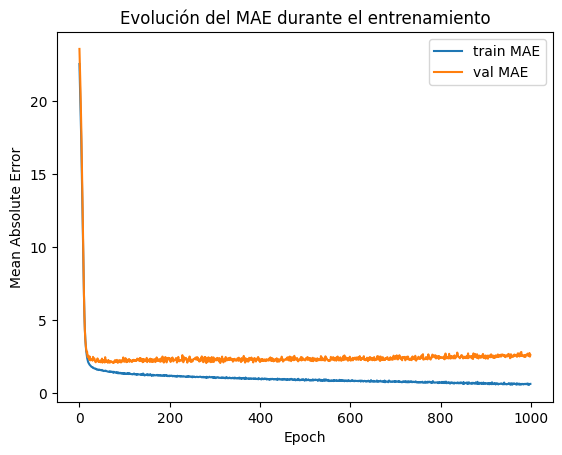

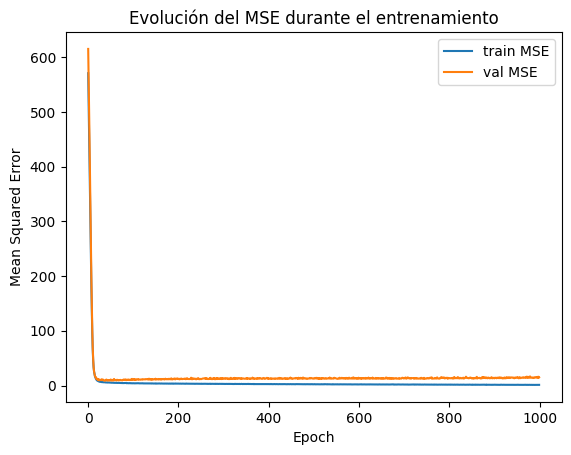

In [37]:
import matplotlib.pyplot as plt

# 1) Evolución del MAE
plt.figure()
plt.plot(history.history['mae'], label='train MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Evolución del MAE durante el entrenamiento')
plt.show()

# 2) Evolución del MSE
plt.figure()
plt.plot(history.history['mse'], label='train MSE')
plt.plot(history.history['val_mse'], label='val MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Evolución del MSE durante el entrenamiento')
plt.show()

¿Alguna conclusión respecto a este gráfico?

Inicialmente (≈100–200 épocas) entrenamiento y validación mejoran a la par, lo que muestra que el modelo está captando patrones generales. Después, el error de validación se estanca o sube mientras el de entrenamiento sigue bajando, señal inequívoca de sobreajuste. Las leves oscilaciones en validación reflejan además la varianza propia de un conjunto reducido (~20 % del total).

Earlystopping me ha ayudado a detener el entrenamiento para no caer en overfitting, también para ahorrar recursos innecesarios.

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

# Configuración de EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',        # métrica a vigilar
    patience=20,               # épocas de paciencia tras la última mejora
    restore_best_weights=True  # al parar, carga los pesos de la mejor época
)

# Entrenamiento con EarlyStopping
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9592 - mae: 0.6246 - mse: 0.9592 - val_loss: 14.1548 - val_mae: 2.5410 - val_mse: 14.1548
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7454 - mae: 0.5106 - mse: 0.7454 - val_loss: 14.6969 - val_mae: 2.6367 - val_mse: 14.6969
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8283 - mae: 0.5286 - mse: 0.8283 - val_loss: 14.1771 - val_mae: 2.5567 - val_mse: 14.1771
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3524 - mae: 0.6221 - mse: 1.3524 - val_loss: 14.6779 - val_mae: 2.5892 - val_mse: 14.6779
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1180 - mae: 0.6058 - mse: 1.1180 - val_loss: 14.2514 - val_mae: 2.5297 - val_mse: 14.2514
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1268 - mae: 0.6270 - mse: 1.1268 - val_loss: 14.0874 - val_mae: 2.5037 - val_mse: 14.0874
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5071 - mae: 0.6856 - mse: 1.5071 

In [40]:
stopped_epoch = early_stop.stopped_epoch
print(f"Detuvo en la época: {stopped_epoch}")

Detuvo en la época: 36


Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

In [41]:
history_30 = model.fit(
    X_train_scaled,
    y_train,
    epochs=30,              # límite fijo
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3495 - mae: 0.6774 - mse: 1.3495 - val_loss: 14.8385 - val_mae: 2.6111 - val_mse: 14.8385
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3882 - mae: 0.6523 - mse: 1.3882 - val_loss: 15.3114 - val_mae: 2.6638 - val_mse: 15.3114
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0147 - mae: 0.5579 - mse: 1.0147 - val_loss: 15.9808 - val_mae: 2.7553 - val_mse: 15.9808
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2691 - mae: 0.6823 - mse: 1.2691 - val_loss: 14.2233 - val_mae: 2.5258 - val_mse: 14.2233
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2173 - mae: 0.6220 - mse: 1.2173 - val_loss: 14.3953 - val_mae: 2.5690 - val_mse: 14.3953
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0839 - mae: 0.5625 - mse: 1.0839 - val_loss: 14.0709 - val_mae: 2.5424 - val_mse: 14.0709
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0352 - mae: 0.6131 - mse: 1.0352 - val_loss: 14

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,               # unas pocas épocas de “respiro”
    restore_best_weights=True
)

history_capped = model.fit(
    X_train_scaled,
    y_train,
    epochs=30,                # máximo razonable
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.4551 - mae: 0.6866 - mse: 1.4551 - val_loss: 14.4110 - val_mae: 2.5859 - val_mse: 14.4110
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1319 - mae: 0.6182 - mse: 1.1319 - val_loss: 13.6457 - val_mae: 2.4892 - val_mse: 13.6457
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8003 - mae: 0.5427 - mse: 0.8003 - val_loss: 14.5240 - val_mae: 2.5832 - val_mse: 14.5240
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9489 - mae: 0.5383 - mse: 0.9489 - val_loss: 14.3313 - val_mae: 2.5694 - val_mse: 14.3313
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2792 - mae: 0.5948 - mse: 1.2792 - val_loss: 14.6666 - val_mae: 2.5462 - val_mse: 14.6666
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0475 - mae: 0.5983 - mse: 1.0475 - val_loss: 14.4074 - val_mae: 2.5645 - val_mse: 14.4074
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8791 - mae: 0.5907 - mse: 0.8791 - val_loss: 14

In [43]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
val_maes = []

for train_idx, val_idx in kf.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Re-crea y compila un modelo limpio para cada fold
    fold_model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(n_features,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    fold_model.compile(
        optimizer=keras.optimizers.RMSprop(0.001),
        loss='mse',
        metrics=['mae']
    )

    hist = fold_model.fit(
        X_tr, y_tr,
        epochs=50,                # probamos un rango algo mayor
        validation_data=(X_val, y_val),
        verbose=0
    )
    val_maes.append(hist.history['val_mae'])

# Convertimos en array (folds × epochs) y promediamos
mean_val_mae = np.mean(val_maes, axis=0)

# ¿En qué época es mínimo?
best_epoch = np.argmin(mean_val_mae) + 1
print(f"Época óptima estimada por CV: {best_epoch}")

c:\Users\nsara\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\nsara\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\nsara\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in

Época óptima estimada por CV: 45


Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3705 - mae: 0.6720 - mse: 1.3705 - val_loss: 15.5903 - val_mae: 2.7011 - val_mse: 15.5903
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0411 - mae: 0.6003 - mse: 1.0411 - val_loss: 14.1314 - val_mae: 2.5469 - val_mse: 14.1314
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9217 - mae: 0.5140 - mse: 0.9217 - val_loss: 14.7778 - val_mae: 2.6102 - val_mse: 14.7778
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7406 - mae: 0.5175 - mse: 0.7406 - val_loss: 15.0251 - val_mae: 2.6685 - val_mse: 15.0251
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0626 - mae: 0.6419 - mse: 1.0626 - val_loss: 15.5270 - val_mae: 2.6727 - val_mse: 15.5270
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1037 - mae: 0.5938 - mse: 1.1037 - val_loss: 15.0277 - val_mae: 2.6203 - val_mse: 15.0277
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8655 - mae: 0.5494 - mse: 0.8655 

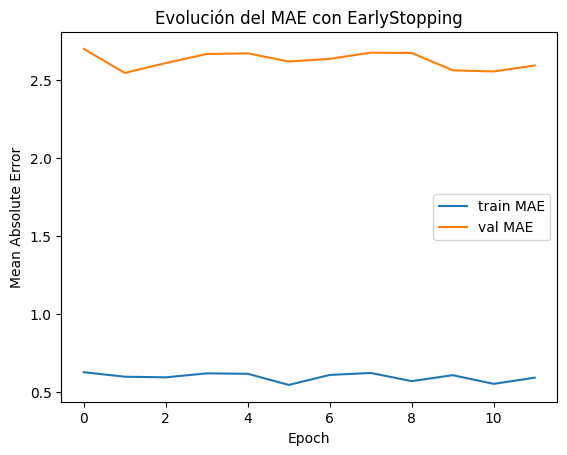

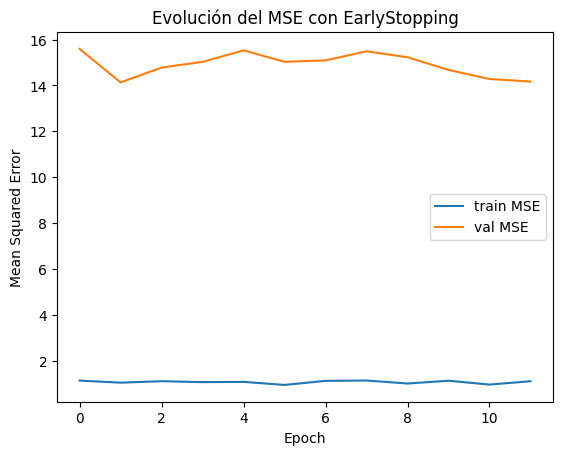

Entrenamiento detenido en época: 12


In [44]:
from tensorflow import keras
import matplotlib.pyplot as plt

# 1. Define el callback de EarlyStopping
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',    # vigilamos la pérdida de validación
    patience=10,           # permitimos 10 épocas sin mejora
    restore_best_weights=True
)

# 2. Entrena el modelo con EarlyStopping
history_es = model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    validation_split=0.2,
    callbacks=[early_stop],  # aquí añadimos EarlyStopping
    verbose=1
)

# 3. Visualiza el progreso

# MAE
plt.figure()
plt.plot(history_es.history['mae'],    label='train MAE')
plt.plot(history_es.history['val_mae'], label='val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Evolución del MAE con EarlyStopping')
plt.show()

# MSE
plt.figure()
plt.plot(history_es.history['mse'],    label='train MSE')
plt.plot(history_es.history['val_mse'], label='val MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Evolución del MSE con EarlyStopping')
plt.show()

# 4. Época en la que se detuvo
print(f"Entrenamiento detenido en época: {early_stop.stopped_epoch + 1}")

Interpreta el gráfico

- Al inicio ambas curvas (entrenamiento y validación) descienden juntas, mostrando aprendizaje de patrones generales.
- Cuando la validación se estanca y el entrenamiento sigue mejorando, EarlyStopping detiene justo antes de caer en sobreajuste.

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [45]:
# Evaluación final en el set de test
test_loss, test_mae, test_mse = model.evaluate(
    X_test_scaled,
    y_test,
    verbose=0
)

print(f"Test loss (MSE): {test_loss:.4f}")
print(f"Test MAE:         {test_mae:.4f} MPG")
print(f"Test MSE:         {test_mse:.4f}")

Test loss (MSE): 13.4364
Test MAE:         2.6160 MPG
Test MSE:         13.4364


Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [47]:
# 1. Selecciona aleatoriamente 10 índices del set de test
idx = np.random.choice(X_test_scaled.shape[0], size=10, replace=False)

# 2. Extrae esas muestras y sus etiquetas verdaderas
X_sample = X_test_scaled[idx]
y_true   = y_test.iloc[idx]

# 3. Predice con el modelo
y_pred = model.predict(X_sample).squeeze()

# 4. Muestra comparativa
for i, (true, pred) in enumerate(zip(y_true, y_pred), start=1):
    print(f"{i:2d}. Real = {true:.2f} MPG, Predicción = {pred:.2f} MPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
 1. Real = 17.60 MPG, Predicción = 25.13 MPG
 2. Real = 27.00 MPG, Predicción = 27.66 MPG
 3. Real = 25.10 MPG, Predicción = 27.16 MPG
 4. Real = 19.00 MPG, Predicción = 20.78 MPG
 5. Real = 18.00 MPG, Predicción = 34.29 MPG
 6. Real = 26.00 MPG, Predicción = 26.84 MPG
 7. Real = 36.00 MPG, Predicción = 38.86 MPG
 8. Real = 20.00 MPG, Predicción = 21.32 MPG
 9. Real = 13.00 MPG, Predicción = 12.41 MPG
10. Real = 29.00 MPG, Predicción = 26.97 MPG


### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


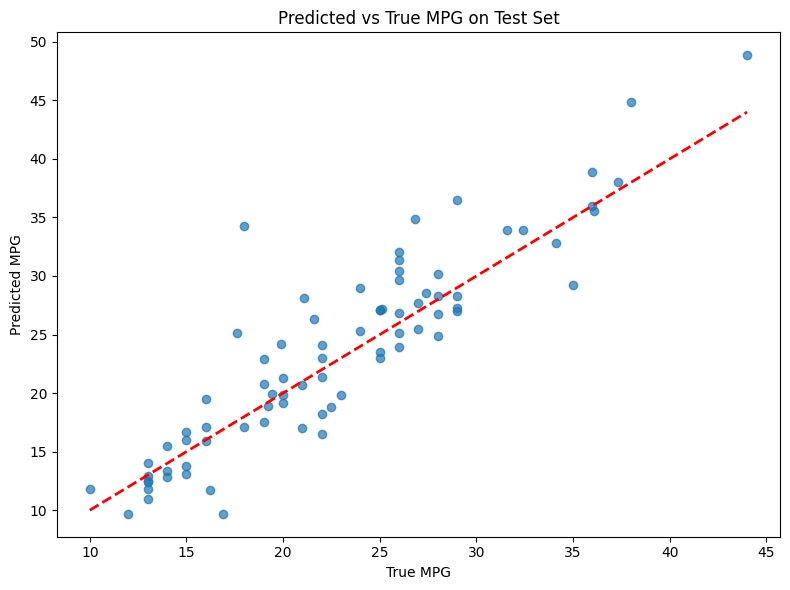

In [48]:
import matplotlib.pyplot as plt

# 1. Obtener predicciones para todo el set de test
y_pred = model.predict(X_test_scaled).squeeze()
y_true = y_test.values

# 2. Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7)
plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         'r--', lw=2)  # línea identidad
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')
plt.title('Predicted vs True MPG on Test Set')
plt.tight_layout()
plt.show()

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


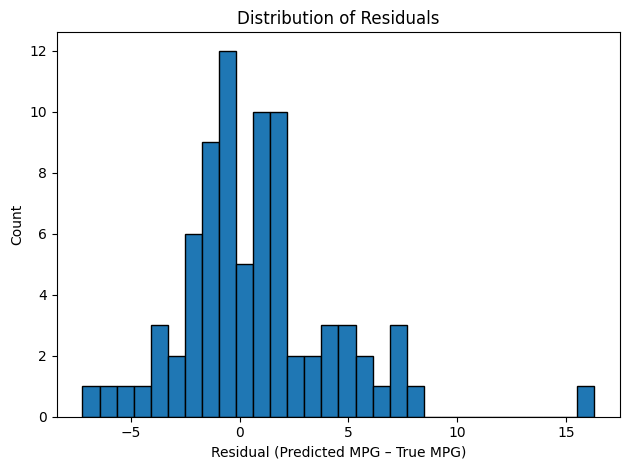

In [49]:
import matplotlib.pyplot as plt

# 1. Calcula predicciones y residuos
y_pred = model.predict(X_test_scaled).squeeze()
y_true = y_test.values
residuals = y_pred - y_true

# 2. Histograma de residuos
plt.figure()
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residual (Predicted MPG – True MPG)')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()


No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [54]:
# formato SavedModel (crea carpeta 'auto_mpg_model/')
model.save('auto_mpg_model.keras')  # Use .keras extension for the native Keras format

## Conclusion